In [99]:
import carla
import math
import random
import time
import queue
import numpy as np
import cv2

client = carla.Client('localhost', 2000)
world  = client.get_world()
bp_lib = world.get_blueprint_library()
world_snapshot = world.wait_for_tick()


In [100]:
actor_list = world.get_actors()
vehicle = actor_list.filter('vehicle.*.*')[0]
print(vehicle)
actor = world_snapshot.find(vehicle.id)
print(actor)
actual_actor = world.get_actor(vehicle.id)
print(actual_actor)
current_map = world.get_map()


Actor(id=30, type=vehicle.carlamotors.firetruck)
ActorSnapshot(id=30)
Actor(id=30, type=vehicle.carlamotors.firetruck)


In [101]:
vehicle_bb_waypoints = actual_actor.bounding_box.get_world_vertices(actor.get_transform())

vehicle_bb_waypoints = [vehicle_bb_waypoints[0], vehicle_bb_waypoints[2], vehicle_bb_waypoints[4], vehicle_bb_waypoints[6]]

# vehicle_bb_waypoints = [vehicle_bb_waypoints[0], vehicle_bb_waypoints[1], vehicle_bb_waypoints[2], vehicle_bb_waypoints[3], vehicle_bb_waypoints[4], vehicle_bb_waypoints[5], vehicle_bb_waypoints[6], vehicle_bb_waypoints[7]]
vehicle_bb_waypoints = [current_map.get_waypoint(vertex) for vertex in vehicle_bb_waypoints]
vehicle_bb_location = [list(map(float,[vertex.transform.location.x,vertex.transform.location.y,vertex.transform.location.z])) for vertex in vehicle_bb_waypoints]
print("***vehicle_bb_waypoints:", vehicle_bb_waypoints)
print("***vehicle_bb_location:", vehicle_bb_location)


***vehicle_bb_waypoints: [<carla.libcarla.Waypoint object at 0x7fba605bd820>, <carla.libcarla.Waypoint object at 0x7fba605bd900>, <carla.libcarla.Waypoint object at 0x7fba605bdc10>, <carla.libcarla.Waypoint object at 0x7fba605004a0>]
***vehicle_bb_location: [[105.48976135253906, 111.56369018554688, 0.0], [102.16809844970703, 110.44567108154297, 0.0], [101.69976806640625, 119.30815887451172, 0.0], [98.36103820800781, 118.06873321533203, 0.0]]


In [102]:
bb_point = vehicle.bounding_box.location
center_point = actor.get_transform().location
print("bb_point:",tuple(map(float,[bb_point.x, bb_point.y, bb_point.z])))
print("center_point:",tuple(map(float,[center_point.x, center_point.y, center_point.z])))

bb_point: (-0.2534406781196594, 0.005304586607962847, 1.9133497476577759)
center_point: (100.94766998291016, 114.80315399169922, -0.0034029006492346525)


In [103]:
bb_point = vehicle.bounding_box
print(bb_point.extent)
print(bb_point.location)

Vector3D(x=4.234021, y=1.445544, z=1.913706)
Location(x=-0.253441, y=0.005305, z=1.913350)


In [104]:
v_bb = [(v.x,v.y,v.z) for v in actual_actor.bounding_box.get_world_vertices(actor.get_transform())][0::2]
v_bb

[(103.8661880493164, 111.10263061523438, -0.0024971545208245516),
 (101.15762329101562, 110.09165954589844, -0.0024632769636809826),
 (100.905029296875, 119.03605651855469, -0.004910795483738184),
 (98.19646453857422, 118.02508544921875, -0.004876918159425259)]

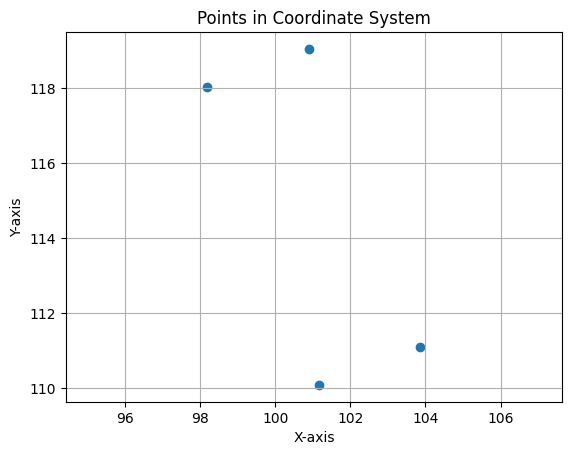

: 

In [105]:
import matplotlib.pyplot as plt

# Separate the x and y coordinates
x_values = [point[0] for point in v_bb]
y_values = [point[1] for point in v_bb]

# Plot the points
plt.scatter(x_values, y_values)

# Add labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a title
plt.title('Points in Coordinate System')

# Set equal aspect ratio
plt.axis('equal')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()